Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset.

- age: continuous.
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt: continuous.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num: continuous.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: Female, Male.
- capital-gain: continuous.
- capital-loss: continuous.
- hours-per-week: continuous.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

 Description of fnlwgt (final weight)


 The weights on the CPS files are controlled to independent estimates of the
 civilian noninstitutional population of the US.  These are prepared monthly
 for us by Population Division here at the Census Bureau.  We use 3 sets of
 controls.

  These are:
          1.  A single cell estimate of the population 16+ for each state.
          2.  Controls for Hispanic Origin by age and sex.
          3.  Controls by Race, age and sex.

 We use all three sets of controls in our weighting program and "rake" through
 them 6 times so that by the end we come back to all the controls we used.

 The term estimate refers to population totals derived from CPS by creating
 "weighted tallies" of any specified socio-economic characteristics of the
 population.

 People with similar demographic characteristics should have
 similar weights.  There is one important caveat to remember
 about this statement.  That is that since the CPS sample is
 actually a collection of 51 state samples, each with its own
 probability of selection, the statement only applies within
 state.

http://archive.ics.uci.edu/ml/machine-learning-databases/adult/

In [1]:
from IPython.display import Markdown, display

import pandas as pd
import numpy as np

%matplotlib inline

In [2]:
df1 = pd.read_csv('adult.csv', skipinitialspace = True, na_values = ['?'], names = ['age','workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 
                                                      'sex', 'capital_gain', 'capital_loss','hours_per_week','native_country', 'income'])

df2 = pd.read_csv('adult_test.csv', skipinitialspace = True, na_values = ['?'], names = ['age','workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 
                                                      'sex', 'capital_gain', 'capital_loss','hours_per_week','native_country', 'income'])
dframes = [df1,df2]
df = pd.concat(dframes)
df.head(3)

age         workclass  fnlwgt  education  education_num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   

       marital_status         occupation   relationship   race   sex  \
0       Never-married       Adm-clerical  Not-in-family  White  Male   
1  Married-civ-spouse    Exec-managerial        Husband  White  Male   
2            Divorced  Handlers-cleaners  Not-in-family  White  Male   

   capital_gain  capital_loss  hours_per_week native_country income  
0          2174             0              40  United-States  <=50K  
1             0             0              13  United-States  <=50K  
2             0             0              40  United-States  <=50K

In [3]:
df.shape

(48842, 15)

In [4]:
df.isnull().values.any()

True

In [5]:
df= df.dropna()
df.head(3)

age         workclass  fnlwgt  education  education_num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   

       marital_status         occupation   relationship   race   sex  \
0       Never-married       Adm-clerical  Not-in-family  White  Male   
1  Married-civ-spouse    Exec-managerial        Husband  White  Male   
2            Divorced  Handlers-cleaners  Not-in-family  White  Male   

   capital_gain  capital_loss  hours_per_week native_country income  
0          2174             0              40  United-States  <=50K  
1             0             0              13  United-States  <=50K  
2             0             0              40  United-States  <=50K

In [6]:
d = {'Private': 1, 'Self-emp-not-inc': 2, 'Self-emp-inc': 3, 'Federal-gov': 4, 'Local-gov': 5, 'State-gov': 6, 'Without-pay': 7, 'Never-worked': 8}
df['workclass'] = df['workclass'].map(d)

#education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
d = {'Bachelors': 1, 'Some-college': 2, '11th': 3, 'HS-grad': 4, 'Prof-school': 5, 'Assoc-acdm': 6, 'Assoc-voc': 7, '9th': 8, '7th-8th': 9, '12th':10, 'Masters':11, '1st-4th':12, '10th':13 , 'Doctorate': 14, '5th-6th': 15, 'Preschool': 16}
df['education'] = df['education'].map(d)

# marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
e = {'Married-civ-spouse': 1, 'Divorced': 2, 'Never-married': 3, 'Separated': 4, 'Widowed': 5, 'Married-spouse-absent': 6,
     'Married-AF-spouse': 7}
df['marital_status'] = df['marital_status'].map(e)

# occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, 
# Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
d = {'Tech-support':1, 'Craft-repair':2, 'Other-service':3, 'Sales':4, 'Exec-managerial':5, 'Prof-specialty':6, 'Handlers-cleaners':7, 'Machine-op-inspct':8, 'Adm-clerical':9, 'Farming-fishing':10, 'Transport-moving':11, 'Priv-house-serv':12, 'Protective-serv':13, 'Armed-Forces':14}
df['occupation'] = df['occupation'].map(d)

# relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
d = {'Wife': 1, 'Own-child': 2, 'Husband': 3, 'Not-in-family': 4, 'Other-relative': 5, 'Unmarried': 6}
df['relationship'] = df['relationship'].map(d)

# race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
d = {'White': 1, 'Asian-Pac-Islander': 2, 'Amer-Indian-Eskimo': 3, 'Other': 4, 'Black': 5}
df['race'] = df['race'].map(d)

# sex: Female, Male.
d = {'Female': 1, 'Male': 2}
df['sex'] = df['sex'].map(d)

# native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India,
#     Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, 
# Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, 
# Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
d = {'United-States':1, 'Cambodia':2, 'England':3, 'Puerto-Rico':4, 'Canada':5, 'Germany':6, 'Outlying-US(Guam-USVI-etc)':7, 'India':8,
'Japan':9, 'Greece':10, 'South':11, 'China':12, 'Cuba':13, 'Iran':14, 'Honduras':15, 'Philippines':16, 'Italy':17, 'Poland':18, 
'Jamaica':19, 'Vietnam':20, 'Mexico':21, 'Portugal':22, 
'Ireland':23, 'France':24, 'Dominican-Republic':25, 'Laos':26, 'Ecuador':27, 'Taiwan':28, 'Haiti':29, 'Columbia':30,
     'Hungary':31, 'Guatemala':32, 'Nicaragua':33, 'Scotland':34, 
'Thailand':35, 'Yugoslavia':36, 'El-Salvador':37, 'Trinadad&Tobago':38, 'Peru':39, 'Hong':40, 'Holand-Netherlands':41}
df['native_country'] = df['native_country'].map(d)

d = {'<=50K': 0, '>50K': 1}
df['income'] = df['income'].map(d)

df.head(10)

age  workclass  fnlwgt  education  education_num  marital_status  \
0   39          6   77516          1             13               3   
1   50          2   83311          1             13               1   
2   38          1  215646          4              9               2   
3   53          1  234721          3              7               1   
4   28          1  338409          1             13               1   
5   37          1  284582         11             14               1   
6   49          1  160187          8              5               6   
7   52          2  209642          4              9               1   
8   31          1   45781         11             14               3   
9   42          1  159449          1             13               1   

   occupation  relationship  race  sex  capital_gain  capital_loss  \
0           9             4     1    2          2174             0   
1           5             3     1    2             0             0   
2           7             4     1    2             0             0   
3           7             3     5    2             0             0   
4           6             1     5    1             0             0   
5           5             1     1    1             0             0   
6           3             4     5    1             0             0   
7           5             3     1    2             0             0   
8           6             4     1    1         14084             0   
9           5             3     1    2          5178             0   

   hours_per_week  native_country  income  
0              40               1     0.0  
1              13               1     0.0  
2              40               1     0.0  
3              40               1     0.0  
4              40              13     0.0  
5              40               1     0.0  
6              16              19     0.0  
7              45               1     1.0  
8              50               1     1.0  
9              40               1     1.0

In [7]:
df= df.dropna()

In [8]:
df.isnull().values.any()

False

In [9]:
df.describe()

age     workclass        fnlwgt     education  education_num  \
count  30162.000000  30162.000000  3.016200e+04  30162.000000   30162.000000   
mean      38.437902      1.736788  1.897938e+05      4.372820      10.121312   
std       13.134665      1.461908  1.056530e+05      3.429379       2.549995   
min       17.000000      1.000000  1.376900e+04      1.000000       1.000000   
25%       28.000000      1.000000  1.176272e+05      2.000000       9.000000   
50%       37.000000      1.000000  1.784250e+05      4.000000      10.000000   
75%       47.000000      2.000000  2.376285e+05      5.000000      13.000000   
max       90.000000      7.000000  1.484705e+06     16.000000      16.000000   

       marital_status    occupation  relationship          race           sex  \
count    30162.000000  30162.000000  30162.000000  30162.000000  30162.000000   
mean         2.053213      5.742159      3.393276      1.445196      1.675685   
std          1.170881      2.978754      1.229789      1.196958      0.468126   
min          1.000000      1.000000      1.000000      1.000000      1.000000   
25%          1.000000      3.000000      3.000000      1.000000      1.000000   
50%          2.000000      5.000000      3.000000      1.000000      2.000000   
75%          3.000000      8.000000      4.000000      1.000000      2.000000   
max          7.000000     14.000000      6.000000      5.000000      2.000000   

       capital_gain  capital_loss  hours_per_week  native_country  \
count  30162.000000  30162.000000    30162.000000    30162.000000   
mean    1092.007858     88.372489       40.931238        2.515583   
std     7406.346497    404.298370       11.979984        5.641075   
min        0.000000      0.000000        1.000000        1.000000   
25%        0.000000      0.000000       40.000000        1.000000   
50%        0.000000      0.000000       40.000000        1.000000   
75%        0.000000      0.000000       45.000000        1.000000   
max    99999.000000   4356.000000       99.000000       41.000000   

             income  
count  30162.000000  
mean       0.248922  
std        0.432396  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000

In [10]:

#here resetting all the features to the original list of  features
all_features = df[['age','workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 
                                                      'sex', 'capital_gain', 'capital_loss','hours_per_week','native_country']].values


all_classes = df['income'].values

feature_names = ['age','workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 
                                                      'sex', 'capital_gain', 'capital_loss','hours_per_week','native_country']

all_features

array([[    39,      6,  77516, ...,      0,     40,      1],
       [    50,      2,  83311, ...,      0,     13,      1],
       [    38,      1, 215646, ...,      0,     40,      1],
       ...,
       [    58,      1, 151910, ...,      0,     40,      1],
       [    22,      1, 201490, ...,      0,     20,      1],
       [    52,      3, 287927, ...,      0,     40,      1]], dtype=int64)

In [11]:
# !pip install mlrose

In [12]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
all_features_scaled = scaler.fit_transform(all_features)
all_features_scaled

C:\Users\maria\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[ 0.04279571,  2.91624496, -1.0627216 , ..., -0.21858598,
        -0.07773411, -0.26867354],
       [ 0.88028814,  0.18004984, -1.00787131, ..., -0.21858598,
        -2.3315307 , -0.26867354],
       [-0.03333996, -0.50399894,  0.24469349, ..., -0.21858598,
        -0.07773411, -0.26867354],
       ...,
       [ 1.48937355, -0.50399894, -0.3585745 , ..., -0.21858598,
        -0.07773411, -0.26867354],
       [-1.25151078, -0.50399894,  0.11070545, ..., -0.21858598,
        -1.74721307, -0.26867354],
       [ 1.0325595 ,  0.86409862,  0.92884082, ..., -0.21858598,
        -0.07773411, -0.26867354]])

In [13]:
# from sklearn.ensemble import RandomForestClassifier
# feat_labels = df.columns[1:]
# forest = RandomForestClassifier(n_estimators= 10000,
#                                random_state =0,
#                                n_jobs= -1)
# forest.fit(X_train, y_train)
# importances = forest.feature_importances_ 
# indices= np.argsort(importances)[::-1]
# for f in range(X_train.shape[1]):
#     print("2%d) %-*s %f" %(f+1,30, feat_labels[f], importances[indices[f]]))

## K-Means

In [14]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.cluster import MeanShift
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [15]:
#!pip install plotly

In [16]:
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode()

In [17]:
analyser = KMeans()
analyser.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

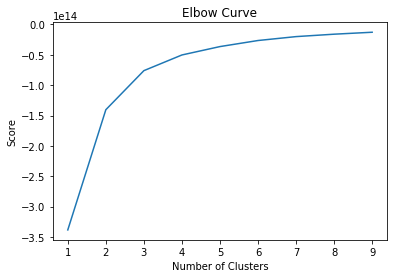

In [18]:
import pylab as pl

Nc = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))]
score

pl.plot(Nc,score)

pl.xlabel('Number of Clusters')

pl.ylabel('Score')

pl.title('Elbow Curve')

pl.show()

In [18]:
kmeans = KMeans(n_clusters=2, random_state=0)
clusters = kmeans.fit_predict(df)
kmeans.cluster_centers_.shape

(2, 15)

In [19]:
cols = df.columns[1:]

In [20]:
cols

Index(['workclass', 'fnlwgt', 'education', 'education_num', 'marital_status',
       'occupation', 'relationship', 'race', 'sex', 'capital_gain',
       'capital_loss', 'hours_per_week', 'native_country', 'income'],
      dtype='object')

In [21]:
cluster = KMeans(n_clusters=2)

In [22]:
cluster.fit_predict(df)

array([0, 0, 0, ..., 0, 0, 1])

In [23]:
df["cluster"]=cluster.fit_predict(df)

In [24]:
df_new = df

In [25]:
kmeans = KMeans(n_clusters=2)

df["X"] = kmeans.fit_transform(df[cols])[:,0]
df["Y"] = kmeans.fit_transform(df[cols])[:,1]


df = df.reset_index()

In [26]:
dfclusters = df[["index","cluster","X","Y"]]

In [27]:
dfclusters.head()

index  cluster              X              Y
0      0        0  249093.380652  249034.355685
1      1        0  243298.042713  243239.011805
2      2        0  110965.719286  110906.687034
3      3        1   91891.741516   91832.709160
4      4        1   11848.413382   11907.154352

In [29]:
trace0 = go.Scatter(x = dfclusters[dfclusters.cluster == 0]["X"],
                    y = dfclusters[dfclusters.cluster == 0]["Y"],
                    name = "Cluster 1",
                    mode = "markers",
                    marker = dict(size = 5,
                                  color = "red",
                                  line = dict(width = 1, color = "red")))

trace1 = go.Scatter(x = dfclusters[dfclusters.cluster == 1]["X"],
                    y = dfclusters[dfclusters.cluster == 1]["Y"],
                    name = "Cluster 2",
                    mode = "markers",
                    marker = dict(size = 5,
                                  color = "blue",
                                  line = dict(width = 1, color = "blue")))

# trace2 = go.Scatter(x = dfclusters[dfclusters.cluster == 2]["X"],
#                     y = dfclusters[dfclusters.cluster == 2]["Y"],
#                     name = "Cluster 3",
#                     mode = "markers",
#                     marker = dict(size = 5,
#                                   color = "green",
#                                   line = dict(width = 1, color = "green")))

# trace3 = go.Scatter(x = dfclusters[dfclusters.cluster == 3]["X"],
#                     y = dfclusters[dfclusters.cluster == 3]["Y"],
#                     name = "Cluster 4",
#                     mode = "markers",
#                     marker = dict(size = 5,
#                                   color = "black",
#                                   line = dict(width = 1, color = "black")))

# trace4 = go.Scatter(x = dfclusters[dfclusters.cluster == 4]["X"],
#                     y = dfclusters[dfclusters.cluster == 4]["Y"],
#                     name = "Cluster 5",
#                     mode = "markers",
#                     marker = dict(size = 5,
#                                   color = "gray",
#                                   line = dict(width = 1, color = "gray")))



data = [trace0, trace1]

iplot(data)